In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
df = pd.read_csv("Loan.csv")

# Preview data
print("Shape:", df.shape)
print(df.info())
print(df.head())

Shape: (614, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male   

In [3]:
#Check target variable and missing values.

print("Loan Status Counts:\n", df['Loan_Status'].value_counts())
print("\nMissing Values:\n", df.isnull().sum())

Loan Status Counts:
 Loan_Status
Y    422
N    192
Name: count, dtype: int64

Missing Values:
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [4]:
# Fill categorical NaN with mode, numeric NaN with mean
for col in df.select_dtypes(include='object'):
    df[col].fillna(df[col].mode()[0], inplace=True)

for col in df.select_dtypes(include=['int64','float64']):
    df[col].fillna(df[col].mean(), inplace=True)

# Convert categorical to numeric
df_encoded = pd.get_dummies(df, drop_first=True)

print(df_encoded.head())

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0  146.412162             360.0   
1             4583             1508.0  128.000000             360.0   
2             3000                0.0   66.000000             360.0   
3             2583             2358.0  120.000000             360.0   
4             6000                0.0  141.000000             360.0   

   Credit_History  Loan_ID_LP001003  Loan_ID_LP001005  Loan_ID_LP001006  \
0             1.0             False             False             False   
1             1.0              True             False             False   
2             1.0             False              True             False   
3             1.0             False             False              True   
4             1.0             False             False             False   

   Loan_ID_LP001008  Loan_ID_LP001011  ...  Gender_Male  Married_Yes  \
0             False             False  ...        

C:\Users\chakr\AppData\Local\Temp\ipykernel_6492\1039354793.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\chakr\AppData\Local\Temp\ipykernel_6492\1039354793.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [5]:
X = df_encoded.drop("Loan_Status_Y", axis=1)  # features
y = df_encoded["Loan_Status_Y"]               # target

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [7]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)

print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Results:
Accuracy: 0.7886178861788617
Confusion Matrix:
 [[18 25]
 [ 1 79]]
Classification Report:
               precision    recall  f1-score   support

       False       0.95      0.42      0.58        43
        True       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



C:\Users\chakr\Downloads\.disk\New folder\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("Classification Report:\n", classification_report(y_test, rf_pred))

Random Forest Results:
Accuracy: 0.7886178861788617
Confusion Matrix:
 [[18 25]
 [ 1 79]]
Classification Report:
               precision    recall  f1-score   support

       False       0.95      0.42      0.58        43
        True       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



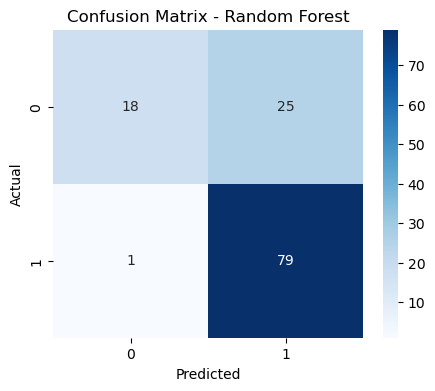

In [9]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

                     Feature  Importance
4             Credit_History    0.189253
0            ApplicantIncome    0.078834
2                 LoanAmount    0.073886
1          CoapplicantIncome    0.048769
3           Loan_Amount_Term    0.035518
625  Property_Area_Semiurban    0.019232
619              Married_Yes    0.016902
623   Education_Not Graduate    0.013505
626      Property_Area_Urban    0.012581
620             Dependents_1    0.012068


C:\Users\chakr\AppData\Local\Temp\ipykernel_6492\4220474352.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_importance.head(10), palette="viridis")


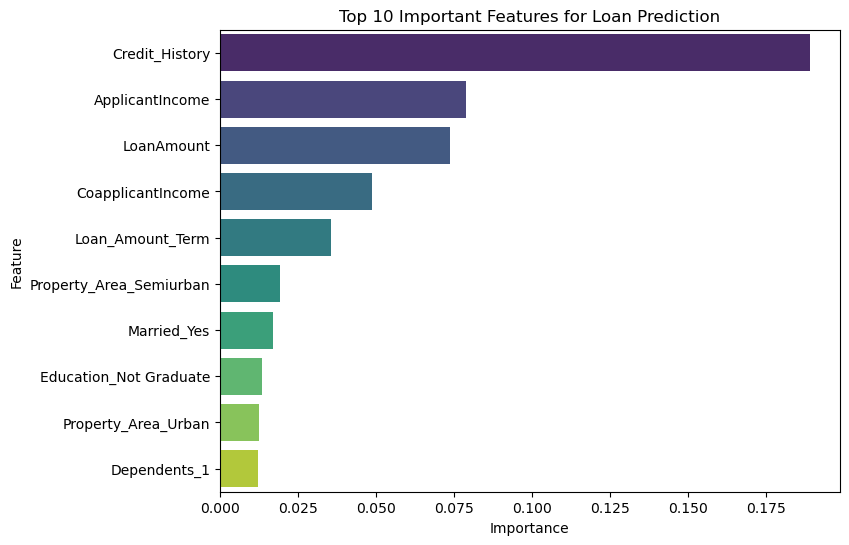

In [10]:
# Get feature importance values from Random Forest
importances = rf.feature_importances_
features = X.columns

# Create a DataFrame
feat_importance = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feat_importance.head(10))  # top 10 features

# Plot feature importance
plt.figure(figsize=(8,6))
sns.barplot(x="Importance", y="Feature", data=feat_importance.head(10), palette="viridis")
plt.title("Top 10 Important Features for Loan Prediction")
plt.show()